In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('car_data.csv')
#print(df)
print(df.head())
print(df.describe())
print(df.info())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   

In [3]:
#data cleaning
#check for missing values
print(df.isnull().sum())

#there is no missing value (NaN)
#if there is missing value so we will drop that row
df.dropna(inplace=True)

df['car age']=2025-df['year']
print(df)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000   

In [4]:
#data preprocessing
#label encoding is required because model can not understand categorical data
le_fuel = LabelEncoder()
le_seller_type = LabelEncoder()
le_transmission = LabelEncoder()

df['fuel']=le_fuel.fit_transform(df['fuel'])
df['seller_type']=le_seller_type.fit_transform(df['seller_type'])
df['transmission']=le_transmission.fit_transform(df['transmission'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int32 
 5   seller_type    4340 non-null   int32 
 6   transmission   4340 non-null   int32 
 7   owner          4340 non-null   object
 8   car age        4340 non-null   int64 
dtypes: int32(3), int64(4), object(2)
memory usage: 254.4+ KB
None


In [5]:
X = df[['car age','km_driven','fuel','seller_type','transmission']]
y = df['selling_price']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
print("mean squareed error = ",mean_squared_error(y_test,y_predicted))
print("r2 score = ",r2_score(y_test,y_predicted))
      

mean squareed error =  185680440881.24243
r2 score =  0.39155137525481265


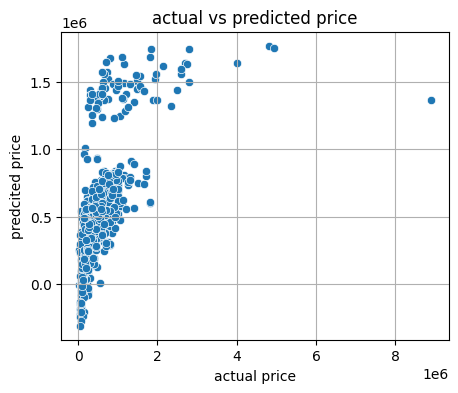

In [12]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=y_test,y=y_predicted)
#should be diagonal that indicates better prediction
plt.title("actual vs predicted price")
plt.xlabel("actual price")
plt.ylabel("predcited price")
plt.grid(True)
plt.show()